# UTS Deep Learning - No 2

#### Nama: Farren Angelica Dinzani
#### NIM: 2702243546
#### Dataset: 2A
#### Link video: https://drive.google.com/file/d/1dvalXjHgWCCpjNfbsQtlLpKCooCo0exO/view?usp=sharing
#### Link video NOMOR 3: https://drive.google.com/file/d/16ccTIEGNfmhcRDI8akF_uHSmBZjz30oD/view?usp=sharing

# EDA & PREPROCESSING

In [1]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

#### Open folder & read dataset

In [2]:
data = 'Dataset 2A'

In [3]:
data_train = os.path.join(data, 'Training')
data_test = os.path.join(data, 'Testing')

#### Informasi data

In [4]:
categories = [category for category in os.listdir(data_train) if not category.startswith('.')]
categories.sort()  # Untuk memastikan urutan kategori yang konsisten
print(categories)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [5]:
for category in categories:
    category_path = os.path.join(data_train, category)
    images = os.listdir(category_path)
    print(f"Class '{category}' memiliki {len(images)} gambar.")


Class 'glioma' memiliki 1321 gambar.
Class 'meningioma' memiliki 1339 gambar.
Class 'notumor' memiliki 1595 gambar.
Class 'pituitary' memiliki 1457 gambar.


- Dataset terdiri dari empat kategori: glioma, meningioma, notumor, dan pituitary.

- Jumlah gambar per kategori: glioma (1321), meningioma (1339), notumor (1595), pituitary (1457).

#### Visualisasi histrogram warna, dimensi gambar, dan aspek rasio

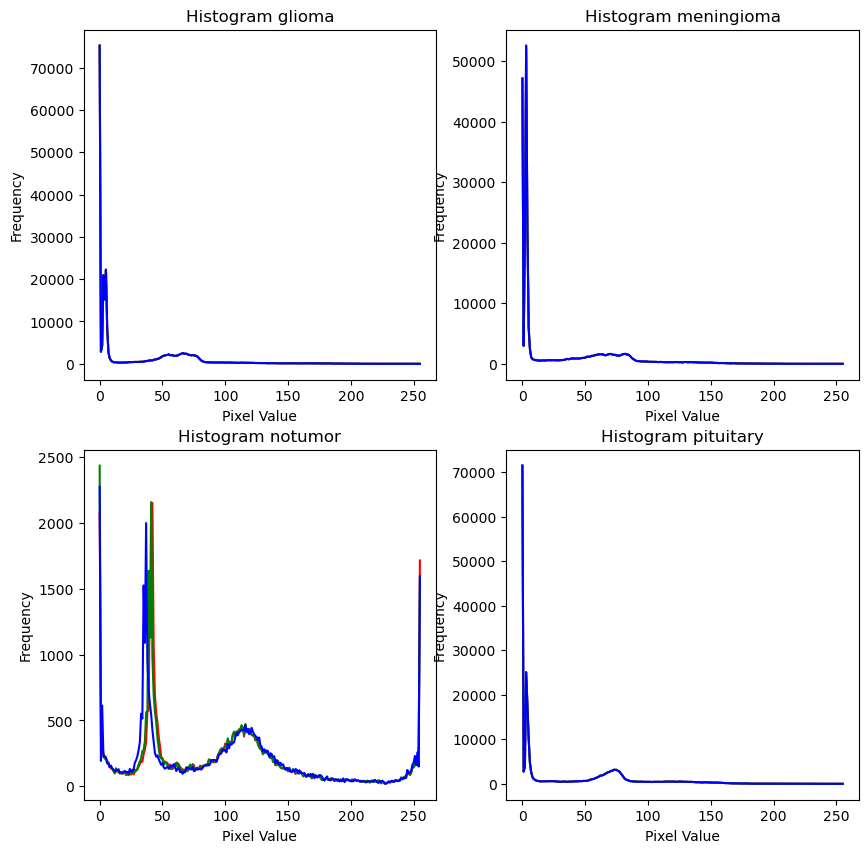

In [6]:
import cv2
from matplotlib import pyplot as plt

# Menampilkan histogram warna untuk setiap kategori
def plot_color_histogram(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Mendapatkan histogram untuk setiap channel (R, G, B)
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        histogram = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
        plt.plot(histogram, color=color)
    plt.title("Histogram Warna")
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

# Menampilkan histogram untuk gambar pertama di setiap kategori
plt.figure(figsize=(10, 10))
for i, category in enumerate(categories):
    img_path = os.path.join(data_train, category, os.listdir(os.path.join(data_train, category))[0])
    plt.subplot(2, 2, i+1)
    plot_color_histogram(img_path)
    plt.title(f"Histogram {category}")
plt.show()


- Kategori glioma, meningioma, dan pituitary memiliki distribusi nilai piksel yang sangat mirip, menunjukkan bahwa gambar dalam kategori ini mungkin memiliki kualitas yang lebih rendah atau kontras yang lebih rendah.

- Kategori notumor menunjukkan distribusi yang lebih luas, menandakan keberagaman intensitas dalam gambar ini. Beberapa gambar tampaknya memiliki kontras atau intensitas yang lebih tinggi, yang mungkin memengaruhi pemrosesan dan klasifikasi gambar.

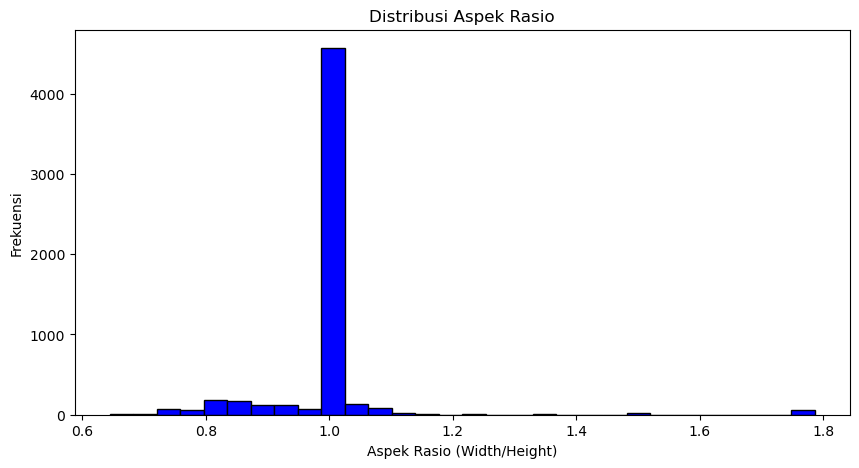

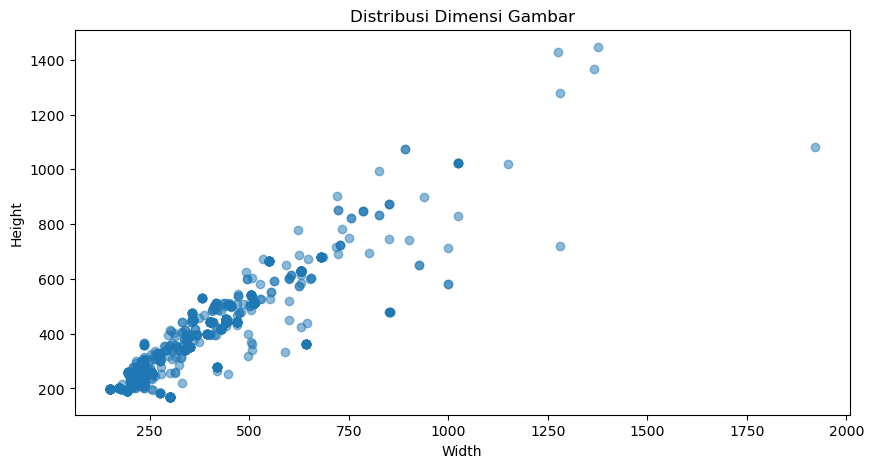

In [7]:
# Memeriksa dimensi gambar dan aspek rasio
img_dimensions = []
aspect_ratios = []

for category in categories:
    category_images = os.listdir(os.path.join(data_train, category))
    for img_file in category_images:
        img_path = os.path.join(data_train, category, img_file)
        img = cv2.imread(img_path)
        height, width, _ = img.shape
        aspect_ratio = width / height
        img_dimensions.append((height, width))
        aspect_ratios.append(aspect_ratio)

# Menampilkan distribusi dimensi dan aspek rasio
img_dimensions = np.array(img_dimensions)
aspect_ratios = np.array(aspect_ratios)

# Plotting aspect ratio
plt.figure(figsize=(10, 5))
plt.hist(aspect_ratios, bins=30, color='blue', edgecolor='black')
plt.title('Distribusi Aspek Rasio')
plt.xlabel('Aspek Rasio (Width/Height)')
plt.ylabel('Frekuensi')
plt.show()

# Plotting dimensi gambar
plt.figure(figsize=(10, 5))
plt.scatter(img_dimensions[:, 1], img_dimensions[:, 0], alpha=0.5)
plt.title('Distribusi Dimensi Gambar')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()


1. Distribusi aspek rasio (Width/Height):
- Mayoritas gambar memiliki rasio aspek sekitar 1, yang mengindikasikan bahwa sebagian besar gambar berbentuk persegi panjang dengan proporsi lebar dan tinggi yang relatif seimbang.

2. Distribusi dimensi gambar (Width vs. Height):
- Sebagian besar gambar memiliki dimensi yang cukup seragam, dengan nilai lebar 250-1500px, tinggi 200-1400px.

#### Contoh gambar dari tiap class

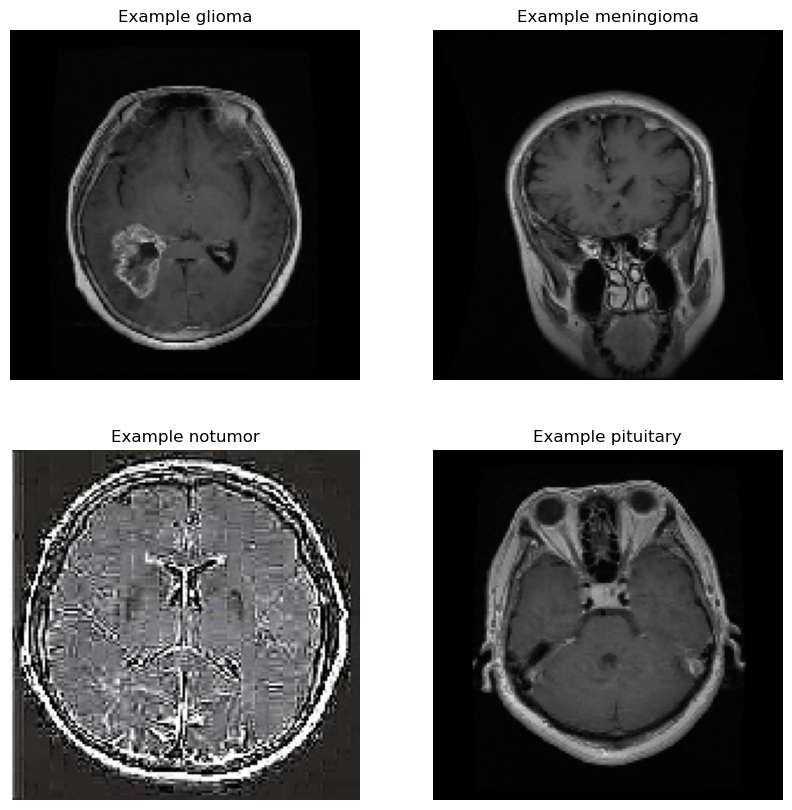

In [8]:
# Melihat gambar dengan variasi pencahayaan atau sudut
plt.figure(figsize=(10, 10))
for i, category in enumerate(categories):
    img_path = os.path.join(data_train, category, os.listdir(os.path.join(data_train, category))[0])
    img = image.load_img(img_path, target_size=(150, 150))
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(f"Example {category}")
    plt.axis('off')
plt.show()


#### Data splitting
Menjadi train, validation, dan test dengan proporsi data validation sebesar 15% dari data train

In [9]:
from sklearn.model_selection import train_test_split

# Menyiapkan data gambar dan label
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(data_train, category)
    category_images = os.listdir(category_path)
    for img_file in category_images:
        img_path = os.path.join(category_path, img_file)
        image_paths.append(img_path)
        labels.append(category)

# Pembagian data menjadi train (85%) dan validation + test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(image_paths, labels, test_size=0.15, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")

Train size: 4855
Validation size: 428
Test size: 429


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat folder untuk masing-masing subset data
def create_data_subsets(X_data, y_data, data_dir, subset_name):
    subset_dir = os.path.join(data_dir, subset_name)
    if not os.path.exists(subset_dir):
        os.makedirs(subset_dir)

    for category in categories:
        category_dir = os.path.join(subset_dir, category)
        if not os.path.exists(category_dir):
            os.makedirs(category_dir)

    for img_path, label in zip(X_data, y_data):
        category_dir = os.path.join(subset_dir, label)
        shutil.copy(img_path, category_dir)

In [11]:
# Membuat folder untuk data training, validation, dan test
create_data_subsets(X_train, y_train, data, 'Train')
create_data_subsets(X_val, y_val, data, 'Validation')
create_data_subsets(X_test, y_test, data, 'Test')

#### Preprocessing dan Augmentasi

In [12]:
import tensorflow as tf

# Fungsi untuk penyesuaian kecerahan
def adjust_brightness(image):
    # Mengubah kecerahan gambar dengan faktor tertentu (contoh: 0.2)
    return tf.image.adjust_brightness(image, delta=0.2)

In [13]:
# Generator dengan normalisasi dan augmentasi untuk data training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi pixel ke rentang [0, 1]
    rotation_range=40,  # Rotasi gambar hingga 40 derajat
    width_shift_range=0.2,  # Geser gambar secara horizontal hingga 20%
    height_shift_range=0.2,  # Geser gambar secara vertikal hingga 20%
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom gambar
    horizontal_flip=True,  # Membalikkan gambar secara horizontal
    fill_mode='nearest',  # Menangani piksel yang hilang setelah transformasi
    preprocessing_function=adjust_brightness
)

# Generator untuk data validasi dan testing (hanya normalisasi)
val_test_datagen = ImageDataGenerator(rescale=1./255)

1. Augmentasi yang diterapkan adalah:
- Rotasi gambar (hingga 40 derajat)
- Pergeseran gambar secara horizontal dan vertikal (hingga 20%)
- Shear transformation (perubahan sudut)
- Zoom gambar (hingga 20%)
- Pembalikan horizontal untuk meningkatkan variasi
2. Function Adjust Brightness mengubah kecerahan gambar dengan faktor delta (0.2).

In [14]:
# Membuat generator untuk data training
train_generator = train_datagen.flow_from_directory(
    os.path.join(data, 'Train'),
    target_size=(224, 224),  # Ukuran gambar harus 224x224
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

validation_generator = val_test_datagen.flow_from_directory(
    os.path.join(data, 'Validation'),
    target_size=(224, 224),  # Ukuran gambar harus 224x224
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

test_generator = val_test_datagen.flow_from_directory(
    os.path.join(data, 'Test'),
    target_size=(224, 224),  # Ukuran gambar harus 224x224
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 4855 images belonging to 4 classes.
Found 428 images belonging to 4 classes.
Found 429 images belonging to 4 classes.


- train_generator, validation_generator, dan test_generator digunakan untuk memberikan data pelatihan, validasi, dan pengujian kepada model.

In [15]:
# Verifikasi class_indices untuk memastikan label sesuai
print("Class indices:", train_generator.class_indices)

Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


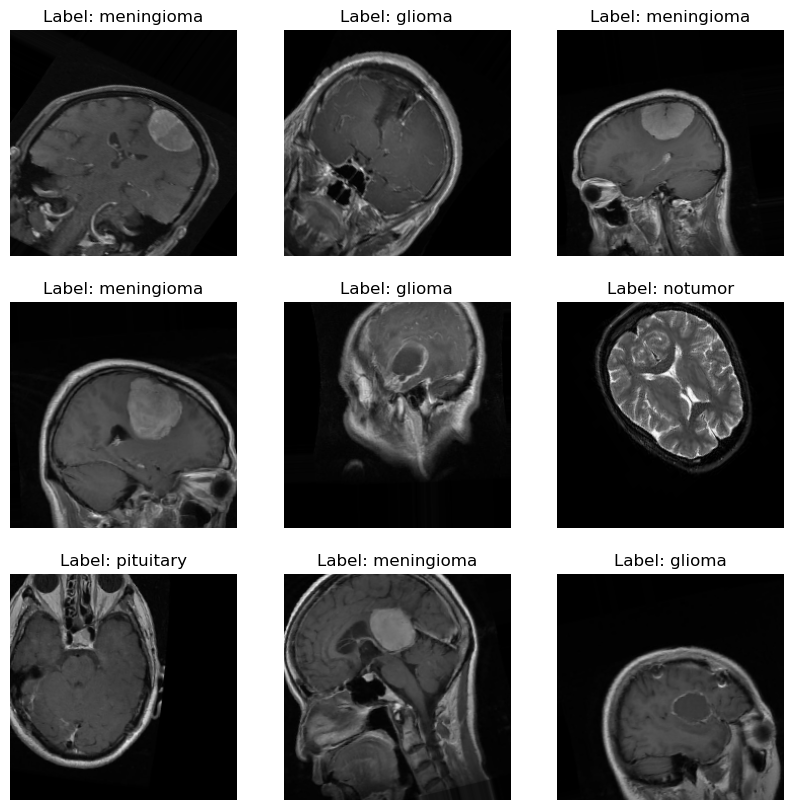

In [17]:
# Menampilkan beberapa contoh gambar dari generator training
import numpy as np
from tensorflow.keras.preprocessing import image

# Mengambil batch pertama dari training generator
x_batch, y_batch = next(train_generator)

# Menampilkan beberapa gambar dari batch pertama
plt.figure(figsize=(10, 10))
for i in range(9):  # Menampilkan 9 gambar pertama
    plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.title(f"Label: {categories[np.argmax(y_batch[i])]}")
    plt.axis('off')
plt.show()


# BASELINE MODEL CNN - AlexNet

#### Arsitektur model AlexNet
1. Input Layer: Model menerima gambar dengan dimensi (224, 224, 3)

2. Convolutional Layers:
- Layer 1: Layer konvolusi pertama menggunakan kernel berukuran (11, 11) dengan stride (4, 4). Proses konvolusi ini diikuti dengan max pooling menggunakan ukuran (3, 3) dengan stride (2, 2). Layer ini berfungsi untuk mendeteksi fitur-fitur awal dalam gambar seperti tepi dan tekstur.

- Layer 2: Layer konvolusi kedua menggunakan kernel berukuran (5, 5) dan padding 'same' dengan jumlah filter sebanyak 256. Seperti pada layer sebelumnya, diikuti dengan max pooling.

- Layer 3 & 4: Kedua layer ini menggunakan kernel berukuran (3, 3) dan padding 'same'. Layer-layer ini bertujuan untuk menangkap fitur-fitur lebih tinggi dan lebih kompleks dalam gambar.

- Layer 5: Layer konvolusi kelima juga menggunakan kernel (3, 3) dengan padding 'same' dan diikuti oleh max pooling untuk mengurangi dimensi fitur.

3. Fully Connected Layers:
- Layer 6 & 7: 4096 neuron masing-masing. Di antara kedua lapisan ini, diterapkan teknik dropout dengan rate 0.5 untuk mengurangi overfitting. Fully connected layers ini digunakan untuk mengklasifikasikan fitur yang diekstrak oleh layer konvolusi ke dalam kelas-kelas yang relevan.

4. Output Layer: Pakai softmax activation function dengan jumlah neuron sebanyak jumlah kelas = 4. Softmax digunakan untuk mengubah output menjadi probabilitas dari setiap kelas.

In [18]:
from tensorflow.keras import layers, models

num_classes = 4

# Model AlexNet
baseline_model = models.Sequential()

# Layer konvolusi pertama
baseline_model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
baseline_model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

# Layer konvolusi kedua
baseline_model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
baseline_model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

# Layer konvolusi ketiga
baseline_model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

# Layer konvolusi keempat
baseline_model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

# Layer konvolusi kelima
baseline_model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
baseline_model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

# Flatten layer sebelum fully connected layers
baseline_model.add(layers.Flatten())

# Fully connected layer pertama
baseline_model.add(layers.Dense(4096, activation='relu'))
baseline_model.add(layers.Dropout(0.5))

# Fully connected layer kedua
baseline_model.add(layers.Dense(4096, activation='relu'))
baseline_model.add(layers.Dropout(0.5))

# Output layer
baseline_model.add(layers.Dense(num_classes, activation='softmax'))

baseline_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

baseline_model.summary()


/Users/farrenangelica/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │        16,388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,763,396 (178.39 MB)

 Trainable params: 46,763,396 (178.39 MB)

 Non-trainable params: 0 (0.00 B)

#### Hyperparameter
1. Optimizer: Adam optimizer dengan learning rate = 1e-4.
2. Loss function: Categorical Crossentropy dipilih sebagai fungsi kerugian karena ini adalah masalah klasifikasi multi-kelas.
3. Metrics: Akurasi digunakan sebagai metrik untuk menilai seberapa baik model memprediksi kelas yang benar.

In [19]:
history = baseline_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator) // 32,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator) // 32
)

/Users/farrenangelica/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


2025-04-16 07:30:39.068413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3031 - loss: 1.3878 - val_accuracy: 0.2780 - val_loss: 1.3649
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2562 - loss: 1.3703 - val_accuracy: 0.2780 - val_loss: 1.3619
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3156 - loss: 1.3769 - val_accuracy: 0.2780 - val_loss: 1.3477
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2792 - loss: 1.3562 - val_accuracy: 0.4136 - val_loss: 1.3714
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3146 - loss: 1.3734 - val_accuracy: 0.2944 - val_loss: 1.3831
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2812 - loss: 1.3818 - val_accuracy: 0.4860 - val_loss: 1.3614
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2458 - loss: 1.3610 - val_accuracy: 0.2780 - val_loss: 1.3294
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3510 - loss: 1.2987 - val_accuracy: 0.2780 - val_loss: 1.3643
Epoch 9/20
4/4 ━━━━━━━━━━━━

#### Training model
- Model dilatih menggunakan data pelatihan yang telah diproses sebelumnya dengan augmentasi gambar seperti rotasi, geser posisi, zoom, dan pembalikan gambar secara horizontal.
- Model dilatih sebanyak 20 epoch dengan menggunakan train_generator dan validation_generator.

In [20]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_baseline = baseline_model.predict(test_generator, steps=len(test_generator), verbose=1)
y_pred_classes_baseline = np.argmax(y_pred_baseline, axis=1)

y_true_baseline = test_generator.classes

print("Classification Report for Baseline Model:")
print(classification_report(y_true_baseline, y_pred_classes_baseline, target_names=test_generator.class_indices.keys()))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
Classification Report for Baseline Model:
              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00       113
  meningioma       0.19      0.18      0.19        92
     notumor       0.27      0.84      0.41       106
   pituitary       0.40      0.03      0.06       118

    accuracy                           0.26       429
   macro avg       0.22      0.26      0.16       429
weighted avg       0.22      0.26      0.16       429



#### Hasil baseline model
- Glioma: Precision, recall, dan f1-score sangat rendah (0.00), menunjukkan model kesulitan mengidentifikasi kelas ini.
- Meningioma: Precision, recall, dan f1-score relatif rendah (0.19, 0.18, 0.19), menunjukkan kesulitan model dalam mendeteksi kelas ini.
- Notumor: Precision lebih tinggi (0.27), tetapi recall yang tinggi (0.84) menunjukkan bahwa model cukup baik dalam mendeteksi kelas ini, meskipun dengan f1-score yang lebih rendah (0.41).
- Pituitary: Precision lebih baik (0.40), tetapi recall sangat rendah (0.03) dan f1-score juga sangat rendah (0.06), menandakan kesulitan besar dalam mendeteksi kelas ini.

#### Analisis
- Class tidak balance: Kelas notumor memiliki performa yang lebih baik, sementara kelas lainnya, terutama glioma dan pituitary, memiliki performa sangat buruk.
- Overfitting: Meskipun ada beberapa perbaikan pada beberapa kelas, model menunjukkan overfitting pada beberapa kelas minoritas seperti pituitary dengan recall yang sangat rendah.

# MODIFIKASI MODEL 

#### Constructing Modification Model
1. Jumlah kelas: Ada 4 kelas (glioma, meningioma, notumor, pituitary) yang model akan prediksi
2. Model - EfficientNetB0:
    - Menghapus fully connected layers sehingga kita dapat menambahkan lapisan kita sendiri.
    - Model pre-trained yang memanfaatkan ImageNet untuk fitur ekstraksi. Dengan mengatur ukuran input gambar menjadi 224x224 px dengan (RGB).
3. Layer model:
    - Batch Normalization membantu mengurangi masalah internal covariate shift.
    - Lapisan fully connected dengan 1024 neuron, diikuti oleh fungsi aktivasi ReLU -> memetakan fitur yang diekstraksi menjadi representasi yang lebih tinggi dan lebih kompleks.
    - Dropout digunakan untuk mencegah overfitting dengan secara acak menonaktifkan 50% neuron.
    - Fungsi aktivasi softmax digunakan untuk mengubah output menjadi probabilitas yang dijumlahkan menjadi 1, dengan kelas yang memiliki probabilitas tertinggi dianggap sebagai hasil prediksi.
4. Menyusun model
    - Adam optimizer digunakan karena efektif dan efisien untuk berbagai jenis masalah. Learning rate ditetapkan pada 1e-4, yang merupakan pilihan konservatif agar pelatihan berjalan stabil.
    - Loss function: Menggunakan categorical crossentropy karena ini adalah case klasifikasi multikelas


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight

num_classes = 4 

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model, 
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(), 
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,370,535 (20.49 MB)

 Trainable params: 1,318,404 (5.03 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

#### Train Modification Model
1. Class weight: digunakan karena dataset tidak seimbang, yaitu beberapa class lebih banyak jumlahnya daripada kelas lainnya.
2. EarlyStopping: untuk menghentikan pelatihan lebih awal jika model tidak menunjukkan perbaikan pada validation loss selama beberapa epoch berturut-turut.
    - Jika validation loss tidak membaik selama 5 epoch berturut-turut, pelatihan akan dihentikan.
3. Learning Rate Scheduler: untuk menurunkan learning rate ketika model tidak menunjukkan peningkatan pada validation loss.
    - Jika validation loss tidak membaik setelah sejumlah epoch (ditentukan oleh patience), learning rate akan dikurangi dengan faktor 0.5.
    - patience = 3: Jika tidak ada peningkatan dalam validation loss selama 3 epoch berturut-turut, learning rate akan dikurangi.
    - min_lr = 1e-6: untuk memastikan bahwa learning rate tidak menjadi terlalu kecil, yang dapat menyebabkan model terhenti sepenuhnya.
4. Model training: 
    - Membagi total jumlah batch dalam generator pelatihan dengan batch size (32) untuk mendapatkan jumlah langkah per epoch.
    - Model akan dilatih selama 30 epoch.

In [31]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator) // 32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator) // 32,
    class_weight=class_weight_dict
)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 152s 20s/step - accuracy: 0.4406 - loss: 1.5724 - val_accuracy: 0.2874 - val_loss: 1.7248
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 59s 15s/step - accuracy: 0.4083 - loss: 1.6578 - val_accuracy: 0.3084 - val_loss: 1.7828
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 8s/step - accuracy: 0.5208 - loss: 1.2989 - val_accuracy: 0.3248 - val_loss: 1.8524
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 44s 13s/step - accuracy: 0.3781 - loss: 1.7896 - val_accuracy: 0.3364 - val_loss: 1.9255
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 33s 7s/step - accuracy: 0.5333 - loss: 1.4026 - val_accuracy: 0.3411 - val_loss: 1.9859
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.4771 - loss: 1.5018 - val_accuracy: 0.3551 - val_loss: 2.0186
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.4646 - loss: 1.7635 - val_accuracy: 0.3575 - val_loss: 2.0644
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.4583 - loss: 1.6166 - val_accuracy: 0.3341 - val_loss: 2.0991
Epoc

#### Fine Tuning
1. Fine-Tuning base model
    - fine_tune_at = 200 -> lapisan ke-200 dalam model akan menjadi titik pemisah: lapisan sebelum lapisan ke-200 akan tetap dibekukan (tidak dilatih), sementara lapisan ke-200 dan setelahnya akan dilatih. Ini memungkinkan model untuk belajar lebih banyak fitur dari dataset target.
2. Freeze layers sebelum Fine-Tuning:
    - Melakukan freeze pada lapisan-lapisan yang lebih awal di model pre-trained (sebelum lapisan ke-200). Artinya, lapisan-lapisan ini tidak akan diperbarui selama fine-tuning.
    - Bobot lapisan tersebut tidak akan berubah selama fine-tuning.
3. Mengompilasi ulang model dengan LR yang lebih kecil
    - Melakukan fine-tuning dengan learning rate yang lebih kecil
    - learning_rate=1e-6 -> untuk mencegah model melakukan perubahan besar pada parameter selama fine-tuning, karena perubahan besar dapat merusak apa yang telah dipelajari sebelumnya.
4. Train model dengan Fine-Tuning
    - Model akan dilatih selama 10 epoch setelah fine-tuning dimulai.
    - early_stopping -> callback yang menghentikan pelatihan jika validation loss tidak membaik selama beberapa epoch berturut-turut, untuk menghindari overfitting.
    - lr_scheduler -> callback yang mengurangi learning rate jika validation loss tidak membaik setelah sejumlah epoch berturut-turut.


In [36]:
# Fine-tuning
base_model.trainable = True
fine_tune_at = 200

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),
              loss='categorical_crossentropy', metrics=['accuracy'])

history_fine_tune = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator) // 32,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator) // 32,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 138s 24s/step - accuracy: 0.3531 - loss: 1.8167 - val_accuracy: 0.3692 - val_loss: 1.8243 - learning_rate: 1.0000e-06
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 7s/step - accuracy: 0.4677 - loss: 1.4464 - val_accuracy: 0.3738 - val_loss: 1.7843 - learning_rate: 1.0000e-06
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 9s/step - accuracy: 0.4198 - loss: 1.8976 - val_accuracy: 0.3785 - val_loss: 1.7450 - learning_rate: 1.0000e-06
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.4208 - loss: 2.0093 - val_accuracy: 0.3832 - val_loss: 1.7121 - learning_rate: 1.0000e-06
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.2854 - loss: 2.1132 - val_accuracy: 0.3832 - val_loss: 1.6775 - learning_rate: 1.0000e-06
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 43s 12s/step - accuracy: 0.4568 - loss: 1.5278 - val_accuracy: 0.3879 - val_loss: 1.6482 - learning_rate: 1.0000e-06
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.3646 - loss: 1.8003 - v

# EVALUATION METRICS

In [37]:
# Evaluasi model pada data test
from sklearn.metrics import classification_report
import numpy as np

# Mengambil prediksi untuk data test
y_pred = model.predict(test_generator, steps=len(test_generator) // 32)
y_true = test_generator.classes

# Menampilkan Classification Report
print("Classification Report:")
print(classification_report(y_true, np.argmax(y_pred, axis=1), target_names=test_generator.class_indices.keys()))

14/14 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step 
Classification Report:
              precision    recall  f1-score   support

      glioma       0.55      0.05      0.10       113
  meningioma       0.10      0.01      0.02        92
     notumor       0.29      0.24      0.26       106
   pituitary       0.27      0.73      0.39       118

    accuracy                           0.28       429
   macro avg       0.30      0.26      0.19       429
weighted avg       0.31      0.28      0.20       429



#### Hasil modified model
1. Glioma: Model menunjukkan performa buruk dengan recall rendah (0.05) dan precision tinggi (0.55), mengindikasikan banyak false positives.
2. Meningioma: Performa sangat buruk dengan precision 0.10 dan recall 0.01, hampir tidak bisa mendeteksi meningioma.
3. Notumor: Precision 0.29 dan recall 0.24, menunjukkan model cukup mengenali notumor, namun masih banyak kesalahan.
4. Pituitary: Precision 0.27 dan recall 0.73, menunjukkan model lebih baik dalam mendeteksi pituitary meskipun banyak false positives.

#### Analisis
    Model menunjukkan accuracy rendah (28%) dan performa buruk pada sebagian besar kelas. Precision dan recall rendah mengindikasikan kesulitan model dalam mengidentifikasi gambar dengan tepat. Hanya untuk pituitary, recall cukup tinggi, tetapi precision masih perlu diperbaiki. Perlu dilakukan perbaikan melalui peningkatan data, pengaturan hyperparameter, dan fine-tuning yang lebih mendalam.